# Linear Regression Labskies

This lab will be very similar to a “Datathon”. During the next week you will work in groups on a dataset called `EcomExpense` to create the best possible model, using the modeling techniques learned in class, to predict the variable `Total.Spend`.

It is important for the development of the lab that you all use the same cross-validation techniques, so all of you will have to divide the dataset in 75%-25% at the beginning. Use the seed `2024` to obtain the same results than your peers.

It is recommended to make a previous study of the dataset in which, in an exploratory way, we can understand the data we are going to work with.

You should explain the parameters of your model and how you arrived at it. It is also important that you check if there is multicollinearity among the variables or if there is any polynomial or interaction effect.

Finally, you will have to defend your model using the different statistics and residual analysis that we have seen in class.

Good luck!

THINGS TO DO (LUIS):
1. Adjusting interpreation 2.1.1
2. Complete 3.6


<hr>

 <h2>Regression Analysis Steps</h2>
<ol>
  <li>Train Original Method: Develop your initial model using your chosen method (e.g., linear regression). ✅
</li>
  <li>Use Backward Selection: Remove variables one by one based on a selection criterion.✅
</li>
  <li>
    Select the Best Model and Analyze in Depth:
    <ul>
      <li>Accuracy, Adequacy,Usefulness: Evaluate if the model fits the data and addresses the research question.</li> 
      <li>Multicollinearity: Check for correlated independent variables.</li> ✅
      <li>Multiple Regression Variables: Intepret Beta Parameters.</li> ✅
      <li>ANOVA ✅ </li> 
      <li>Interaction & Polynomial Effects: Analyze how variables interact or have non-linear relationships. </li> ✅

</li>
      <li>Residual Analysis: Assess the model's residuals for any patterns or violations of assumptions.</li>
    </ul>
  </li>
  <li>Test the Selected Model: Evaluate the model's performance on unseen data and compare it to training metrics. ✅</li>
  
</ol>



# INTRO

This study employs different statistical procedures to identify the optimal model for a regression analysis. The chosen model will undergo rigorous evaluation to ensure its adequacy, interpretability, and generalizability.
The selected dataset is e-commerce platform's data.

We have undertaken two different approaches both for point 1 (original model training), and 2 (best model selection). This assist us in our endaovur to guarantee the accuracy of our results.



<hr>

In [22]:
# LIBRARIES
import numpy as np
from scipy import stats
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as ss


import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split as tts

import itertools

import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.stats.anova import anova_lm

from statsmodels.stats.stattools import durbin_watson
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



# 0) ADJUSTING DATASET

In [3]:
# IMPORT CSV
url1 = "/Users/javierdominguezsegura/Academics/College/Courses/SMUC/Topic 5 - Linear regression/Lab 5 (final)/linear_regression_lab-1/data/dataset/EcomExpense.csv"
url2 = "/Users/luisinfanten/Desktop/IE/Classes/First-Year/Second-Semester/Simulating and Modelling/Models/Notebooks/data/dataset/EcomExpense.csv"

# Declarign both response and explantory variables
columns = ["TransactionID", "Age", "Items", "MonthlyIncome", "TransactionTime", "Record", "Gender", "CityTier", "TotalSpend"]

data = pd.read_csv(url1, names = columns, header = 0)

# Removing 'TransactionID'
data = data.drop(data.columns[0], axis=1)

data.head()

,Age,Items,MonthlyIncome,TransactionTime,Record,Gender,CityTier,TotalSpend
0,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


# 1)  TRAINING ORIGINAL MODEL

Two different approaches has been taken on how to treat the categorical variables (Gender and CityTier) included in this dataset. The consistency between these two approaches enhances the confidence in the accuracy of our results.

Note original model is training the basic initial version of the model that includes all the response variables from the received dataset, and does not conceive interactions effects, multicolinearity or polynomial effect.

## 1.1) Auto dummyfying original model, first approach

In [4]:
# Original model 
original_model_formula = "TotalSpend ~ Age + Items + MonthlyIncome + TransactionTime + Record + C(Gender) + C(CityTier)" # Dummification will happen behind the scenes as for using the prefix C()

train_data, test_data = tts(data, test_size = .25, random_state = 2024)

#Check Proper Split
print(train_data.shape)
print(test_data.shape)

(1771, 8)
(591, 8)


In [5]:
# Perfoming Ordinary Least Squares (parameters estimation)
original_model = smf.ols(formula=original_model_formula, data=train_data).fit()

print(original_model.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalSpend   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     2658.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:26:34   Log-Likelihood:                -14307.
No. Observations:                1771   AIC:                         2.863e+04
Df Residuals:                    1762   BIC:                         2.868e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -741.72

In [6]:
# Declaring function for basic erroy analysis. To be invoked all throughout the program
def basic_error_analysis(model):
      
      sse = model.ssr # sum squared error --> Variability between residuals  (actual values - predicted values)
      mse = model.mse_resid # mean squared error --> SSE / number of y (in this case, 1771)
      rse = np.sqrt(mse) # relative standard error
      percentage_error = (rse/data["TotalSpend"].mean())*100

      print("SSE:",round(sse, 3))
      print("MSE:",round(mse, 3))
      print("RSE:",round(rse, 3))
      print("Mean Error:",round(percentage_error, 3))
      print(f"IC: (^y - {round(rse *2,2)}, ^y + {round(rse *2,2)} ) ")

In [7]:
basic_error_analysis(original_model)

SSE: 1078022474.811
MSE: 611817.523
RSE: 782.188
Mean Error: 12.691
IC: (^y - 1564.38, ^y + 1564.38 ) 


## 1.2) Dummyfying original model, second approach

In [8]:
data = pd.get_dummies(data, columns=['Gender', 'CityTier'], drop_first=True, dtype=int)
data = data.rename(columns={'CityTier_Tier 2': 'CityTier_Tier_2', 'CityTier_Tier 3': 'CityTier_Tier_3'})
data

,Age,Items,MonthlyIncome,TransactionTime,Record,TotalSpend,Gender_Male,CityTier_Tier_2,CityTier_Tier_3
0,42,10,7313,627.668127,5,4198.385084,0,0,0
1,24,8,17747,126.904567,3,4134.976648,0,1,0
2,47,11,22845,873.469701,2,5166.614455,1,1,0
3,50,11,18552,380.219428,7,7784.447676,0,0,0
4,60,2,14439,403.374223,2,3254.160485,0,1,0
...,...,...,...,...,...,...,...,...,...
2357,50,7,5705,460.157207,3,2909.619546,1,1,0
2358,35,11,11202,851.924751,8,7968.633136,1,1,0
2359,27,5,21335,435.145358,8,8816.406448,0,0,1
2360,45,12,19294,658.439838,7,7915.595856,0,0,0


In [9]:
# Cross validation by 'holdout' (75% train - 25% test)
model_formula = 'TotalSpend ~ Age + Items + MonthlyIncome + TransactionTime + Record + Gender_Male + CityTier_Tier_2 + CityTier_Tier_3'
train_data, test_data = tts(data, test_size = 0.25 , random_state = 2024)

In [10]:
#Check Proper Split
print(train_data.shape)
print(test_data.shape)

(1771, 9)
(591, 9)


In [11]:
original_model = smf.ols(formula=model_formula, data=train_data).fit()
print(original_model.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalSpend   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     2658.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:26:34   Log-Likelihood:                -14307.
No. Observations:                1771   AIC:                         2.863e+04
Df Residuals:                    1762   BIC:                         2.868e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -741.7281     99.770     

In [12]:
basic_error_analysis(original_model)

SSE: 1078022474.811
MSE: 611817.523
RSE: 782.188
Mean Error: 12.691
IC: (^y - 1564.38, ^y + 1564.38 ) 


# 2) BEST MODEL SELECTION, ALGORITHM

Two different approaches have been taken in the selection process of the best performing model. The consistency between these two approaches enhances the confidence in the accuracy of our results.

## 2.1) Stepwise selection, first approach

In [13]:
#Using Stepwise Regression
target = train_data['TotalSpend']
predictors = train_data.drop(columns='TotalSpend')

linear_regression = LinearRegression()

# Forward Selection
forward_selector = SFS(linear_regression,
                       k_features="best",
                       forward=True,
                       floating=False,
                       scoring='r2',
                       cv=0)
forward_selector.fit(predictors, target)
forward_selected_features = list(predictors.columns[list(forward_selector.k_feature_idx_)])
print("Forward Selection: ", forward_selected_features)

# Backward Elimination
backward_selector = SFS(linear_regression,
                        k_features="best",
                        forward=False,
                        floating=False,
                        scoring='r2',
                        cv=0)
backward_selector.fit(predictors, target)
backward_eliminated_features = list(predictors.columns[list(backward_selector.k_feature_idx_)])
print("Backward Elimination: ", backward_eliminated_features)

Forward Selection:  ['Age', 'Items', 'MonthlyIncome', 'TransactionTime', 'Record', 'Gender_Male', 'CityTier_Tier_2', 'CityTier_Tier_3']
Backward Elimination:  ['Age', 'Items', 'MonthlyIncome', 'TransactionTime', 'Record', 'Gender_Male', 'CityTier_Tier_2', 'CityTier_Tier_3']


In [14]:
def summarize_results(selector, method, predictors):
    selected_features = list(predictors.columns[list(selector.k_feature_idx_)])
    print(f"{method} Results:")
    print("Selected features:", selected_features)
    print("Number of features:", selector.k_feature_names_)
    print("R-squared:", selector.k_score_)
    print("\nFeature Selection History:")
    for idx, values in selector.subsets_.items():
        print("Step", idx, ": Features", list(predictors.columns[list(values["feature_idx"])]), "- R-squared:" ,values["avg_score"])

# Summarize Forward Selection results
summarize_results(forward_selector, "Forward Selection", predictors)
print("\n")
# Summarize Backward Elimination results
summarize_results(backward_selector, "Backward Elimination", predictors)

Forward Selection Results:
Selected features: ['Age', 'Items', 'MonthlyIncome', 'TransactionTime', 'Record', 'Gender_Male', 'CityTier_Tier_2', 'CityTier_Tier_3']
Number of features: ('Age', 'Items', 'MonthlyIncome', 'TransactionTime', 'Record', 'Gender_Male', 'CityTier_Tier_2', 'CityTier_Tier_3')
R-squared: 0.9234744064515731

Feature Selection History:
Step 1 : Features ['Record'] - R-squared: 0.7360232838885956
Step 2 : Features ['MonthlyIncome', 'Record'] - R-squared: 0.9157753854218289
Step 3 : Features ['Items', 'MonthlyIncome', 'Record'] - R-squared: 0.9190520432494808
Step 4 : Features ['Items', 'MonthlyIncome', 'Record', 'Gender_Male'] - R-squared: 0.9216096290764781
Step 5 : Features ['Items', 'MonthlyIncome', 'Record', 'Gender_Male', 'CityTier_Tier_3'] - R-squared: 0.9225682649449898
Step 6 : Features ['Age', 'Items', 'MonthlyIncome', 'Record', 'Gender_Male', 'CityTier_Tier_3'] - R-squared: 0.9230822105390406
Step 7 : Features ['Age', 'Items', 'MonthlyIncome', 'TransactionTim

## 2.1.1) Interpretation, stepwise selection, first approach

<p><b> Conclusions on stepweise:</b>  We see that when optimizing for r2 using backward and forward regression, using all variables results in the best r2. However, since the p-value of city_tier_2 is quite large, we will still remove it (noting that we would be loosing some r2 value) </p>

## 2.2) Best subset selection, second approach

### Comprenhesive model evaluation: 
$f(r_2, \text{AIC}, \text{BIC}, \text{subset\_size}) = 1 \cdot ((R^2)^2) + 0.5 \cdot (-\log(\frac{\text{AIC} + \text{BIC}}{2})) + 200 \cdot (-\log(\text{subset\_size}))$


In [15]:
def weighted_analysis(aic, bic, r_2, subset_size):
        
      """ 

      Def = this function will weight the parameters of each model (e.g: r2 is more 'favored' than BIC)
            This algorithm will penalyze AIC, BIC and subset_size (parsimony) for being large, and will reward R2 for being large.
            We have taken the average between AIC and BIC to facilitate computations. The differencce between the two 
            is usually close to zero, meaning, the average of the two is representative of the combination (not affected
            by a large value against a smaller one)

            This algorithm contains a visual representation in 'algo.py'. 

            The heigher the transformation the better.

      Args:
            r_squared: The R-squared value of a model (float).
            AIC: The Akaike Information Criterion value of a model (float).
            BIC: The Bayesian Information Criterion value of a model (float).
            subset_size: The number of features in the model (int).

      Returns:
            A float representing the score of the model
    
      """

      # Get percentage to become complete integer
      r_2 = r_2 * 100

      # Avoid 
      if subset_size == 0: 
            subset_size = 1
            

      w_1 = 1 #R2
      w_2 = .5 #AIC+BIC
      w_3 = 200 #PARSIMONY -- We multiply by such a high coeficient because the order of magnitude of R2 is very high (10^3), whereas the 'subset_size', originally, gets as large as up to len(full_model) (i.e: 8)

      # Average between the two metrics
      aic_bic_average = (aic + bic) /2 

      f = r_2 **2
      g = -np.log((aic_bic_average))
      h = -np.log((subset_size)) 


      transformation = (w_1 * f) + (w_2 * g) + (w_3 * h)


      return transformation

In [16]:
# Function to fit a model and return the adjusted R-squared
def fit_model_and_calc_aic(y, X, subset_size):
    
     """
    
     Defintion: Train each iteration of models
    
     """

     X = sm.add_constant(X)
     model = sm.OLS(y, X).fit()

     aic = model.aic
     bic = model.bic
     r2 = model.rsquared_adj


     return {"aic" : aic, "bic" : bic, "r2" : r2, "weighted" : weighted_analysis(aic, bic,r2,subset_size)}

In [17]:
def best_subset_reg(df, target, predictors, metric = "weighted"):
  
      """
      
      Def: forward selection from the original model. Get metric on each version (iteration)
      
      """

      positive_metric = ["r2", "weighted"] #positive meaning the higher the value the better
      negative_metric = ["aic", "bic"]

      print("BEST MODEL SELECTION ALGORITHM")
      print("-"*50)

      # Initialize the best subset and its performance
      all_subsets = []
      all_models = []
      all_metrics = [] # Used for plot


      # Iterate over all possible subsets of predictors
      for subset_size in range(len(predictors)):
            for subset in itertools.combinations(predictors, subset_size): #Get combinatorics for n = total_n_of_features, k = n_of_features_in_subset
                  X = df[list(subset)] # Add new column with combination
                  model = fit_model_and_calc_aic(target, X, subset_size)
                  all_subsets.append(subset)
                  all_models.append(model)
                  all_metrics.append(model[metric])
      
      # Dissamble each metric for all models
      all_weighted = [item["weighted"] for item in all_models]
      all_aic = [item["aic"] for item in all_models]
      all_bic = [item["bic"] for item in all_models]
      all_r2 = [item["r2"] for item in all_models]
      
      
      # Create pandas dataframe with all models' metrics
      best_sub_reg = {"MODEL": all_subsets,"WEIGHTED":all_weighted,"R2":all_r2,"AIC": all_aic, "BIC": all_bic}
      best_sub_reg = pd.DataFrame(best_sub_reg) 

      if metric in positive_metric:
            top_4_values_large = best_sub_reg.sort_values(by=metric.upper(), ascending=False).head(4)
            print(f"\nModel selected (FROM MAX TO MIN) by metric '{metric}'")
            print("-"*10)

            print(top_4_values_large)
      elif metric in negative_metric:
            top_4_values_small = best_sub_reg.sort_values(by=metric.upper(), ascending=False).head(4)
            print(f"\nModel selected (FROM MIN TO MAX) by metric '{metric}'")
            print("-"*10)
            print(top_4_values_small)


      # Get plot on evolution for all iterations
      print("\nPLOTTING RESULTS:")
      print("-"*10)
      plt.plot(all_metrics)
      plt.title("Evolution of puntaition over iterations of models (from null model to complete model):")
      plt.xlabel("Iterations") 
      plt.ylabel(f"Punctuation '{metric}'")
      plt.show()

      return best_sub_reg 

BEST MODEL SELECTION ALGORITHM
--------------------------------------------------

Model selected (FROM MAX TO MIN) by metric 'weighted'
----------
                                           MODEL     WEIGHTED        R2  \
23                       (MonthlyIncome, Record)  8240.937148  0.915680   
59                (Items, MonthlyIncome, Record)  8219.185263  0.918915   
77          (MonthlyIncome, Record, Gender_Male)  8208.679665  0.918343   
132  (Items, MonthlyIncome, Record, Gender_Male)  8207.979822  0.921432   

              AIC           BIC  
23   28789.768232  28806.206131  
59   28721.493581  28743.410780  
77   28733.938468  28755.855667  
132  28666.635026  28694.031524  

PLOTTING RESULTS:
----------


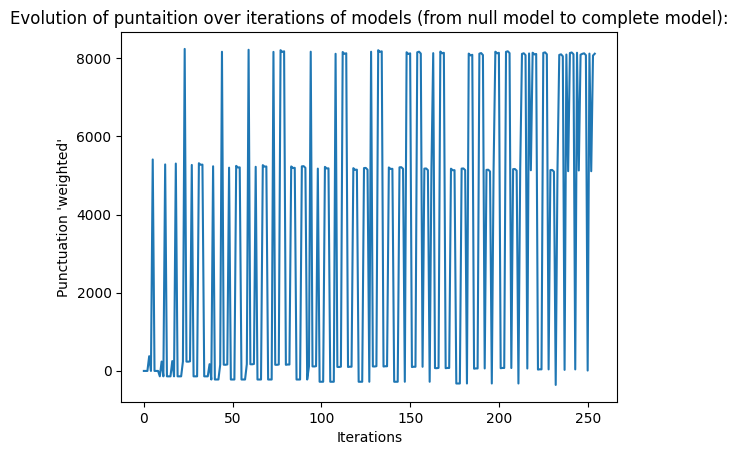

BEST MODEL SELECTION ALGORITHM
--------------------------------------------------

Model selected (FROM MAX TO MIN) by metric 'r2'
----------
                                                 MODEL     WEIGHTED        R2  \
248  (Age, Items, MonthlyIncome, TransactionTime, R...  8128.121094  0.923170   
226  (Age, Items, MonthlyIncome, Record, Gender_Mal...  8152.494872  0.922821   
251  (Age, Items, MonthlyIncome, Record, Gender_Mal...  8120.859270  0.922777   
241  (Items, MonthlyIncome, TransactionTime, Record...  8149.910702  0.922681   

              AIC           BIC  
248  28630.001973  28673.836370  
226  28637.049927  28675.405025  
251  28639.046734  28682.881131  
241  28640.260044  28678.615141  

PLOTTING RESULTS:
----------


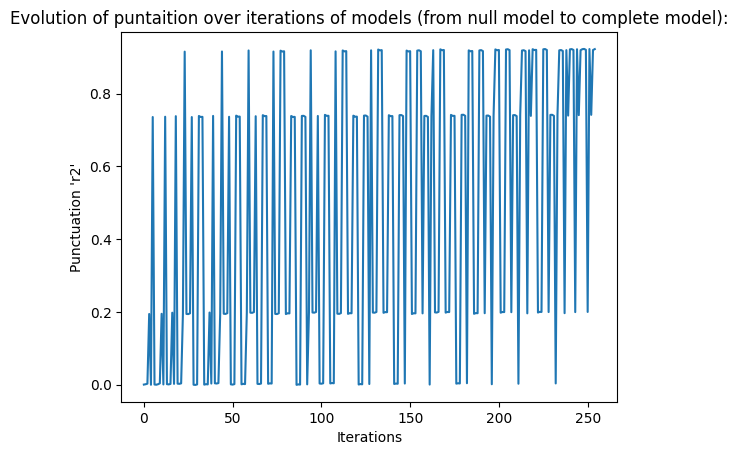


--> Results succesfully saved in csv


In [18]:

# Define the target/response variable
target = train_data["TotalSpend"]

# Define the predictor variables
predictors = ["Age", "Items", "MonthlyIncome", "TransactionTime", "Record", "Gender_Male", "CityTier_Tier_2", "CityTier_Tier_3"]


# Use the function (we will call twice with different metrics)
allsub = best_subset_reg(df=train_data, target = target, predictors=predictors, metric="weighted")
allsub_ = best_subset_reg(df=train_data, target = target, predictors=predictors, metric="r2")


path = "/Users/javierdominguezsegura/Academics/College/Courses/SMUC/Topic 5 - Linear regression/Lab 5 (final)/linear_regression_lab-1/data/best_model_results/best_model_results.csv"
path2 = "/Users/luisinfanten/Desktop/IE/Classes/First-Year/Second-Semester/Simulating and Modelling/Models/Notebooks/data/best_model_results/best_model_results.csv"
allsub.to_csv(path)
print("\n--> Results succesfully saved in csv")

## 2.2.1) Interpretation, best subset regression, second approach


The first chart plots punctuation of the weighted function/algorithm value (response variable) against the iteration of all possible combinations of models (explanatory variable). The second  plot displays the results for the metric "r2". The contrast of these two plots showcases a very close similarity, yet presents slight variations. Even tough the weighted average is mainly influenced by the r2, we can observe more variability in the upper cluster. This is a result of the parsimony effect (penalizing for the inclusion of more features). Most visual variability between the two plots, is in fact due to the introduction of the parsimony effect into the function, other smaller variations are due to the another addition of BIC and AIC.

Both results tend to increase as the models gets more features, yet this function/algorithm is not strictly increasing throughout the iterations of models. Clusters are formed at the end and beginning (more visible in the former) of the plot. Within this clusters there is significant oscilation, this is the result of high spontaneous values of the coefficient of determination (r2), that are highly 'rewarded' in the weighted average. Nevertheless, note the most punctuation is concentrated in the upper cluster. We observe that the least punctuation between the two plots is constant to the lower cluser. However with the weighted average the average value of the lower cluster is smaller as for taking into account more variables. Finally, note that the difference between the iteartions in the model with respect to the upper cluster is smaller in the weighted algorithm. This is because we mitigate the prior described spontaneous oscilations by weighted more variables.

Essentialy, 'weighted' algorithm is more informative than closing the interpretation to a single variable. 

Note: by cluster it is meant the extensive aggrupation of similar data observations on a specific area of the plot. 


# 3) MODEL ANALYSIS

From the two approaches involves, the conclusions aim to select as the best model"(MonthlyIncome, Record)" .

It presents a very significant coefficient of determination (95th percentile of all models), small BIC and AIC (95th percentile) and has only 2 variables (highly rewarded via the Parsimony effect).

Note that even tough the model "(Items, MonthlyIncome, Record)" has a slight improvement in r_2 (.4%) and better AIC and BIC (-6, -1 correspondly), the 'weighted' algorithm opted for the model with the least parameters as for taking the parsimony effect into place. By manually searching within all the results from the first approach (stepwise selection), we reached the same conclusion.

We will now proceed to analyze this model in more depth, with the possibility to update its formula based on interaction or polynomial effect.


In [19]:
model_formula = "TotalSpend ~ MonthlyIncome + Record"

best_model_before_analysis = smf.ols(formula=model_formula, data=train_data).fit()

print(best_model_before_analysis.summary())


                            OLS Regression Results                            
Dep. Variable:             TotalSpend   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     9612.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:26:36   Log-Likelihood:                -14392.
No. Observations:                1771   AIC:                         2.879e+04
Df Residuals:                    1768   BIC:                         2.881e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -44.5361     52.977     -0.841

In [21]:
basic_error_analysis(best_model_before_analysis)

""" 

Some analysis I did in other exercise (base it on this for RSE): 

We expect 95% of the observed values (total spend) from the hypothesis to lie within 2*RSE, that is (^y - 1564.38, ^y + 1564.38 ) will contain the true value. 

We are misestimating 12.691% of the observations
"""

SSE: 1186479231.816
MSE: 671085.538
RSE: 819.198
Mean Error: 13.292
IC: (^y - 1638.4, ^y + 1638.4 ) 


<h2>3.3) Multicolinearity<h2>

In [ ]:
predictors2 = train_data.drop(columns=['TotalSpend', 'CityTier_Tier_2', 'Age', 'Items', 'TransactionTime', 'Gender_Male', 'CityTier_Tier_3'])
predictors2 = predictors2.assign(const=1)
predictors2.head()

,MonthlyIncome,Record,const
918,18713,0,1
1720,27719,9,1
401,27314,10,1
994,7117,8,1
430,10518,5,1


In [ ]:
# Compute the VIF for each explanatory variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(predictors2.values, i) for i in range(predictors2.shape[1])]
vif["Explanatory"] = predictors2.columns

# Print the VIF table
print(vif)

   VIF Factor    Explanatory
0    1.000405  MonthlyIncome
1    1.000405         Record
2    7.406534          const


<h4>We check all variables except the remove CityTier_Tier_2, and it is clear that there appears to be no multicolinearity. As a VIF value close to 1 means that there is no multicolinearity, and all values are close to one, we can safely disregard multicolinearity as an intervening factor.<h4>

## 3.4) ANOVA

In [25]:
#Null model
null_model = smf.ols(formula = "TotalSpend ~ 1", data = train_data).fit()
print(null_model.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalSpend   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                nan
Time:                        17:54:54   Log-Likelihood:                -16583.
No. Observations:                1771   AIC:                         3.317e+04
Df Residuals:                    1770   BIC:                         3.317e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6178.3582     67.037     92.163      0.0

In [26]:
# Null model against best_model_before_analysis
anova_lm(null_model, best_model_before_analysis)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1770.0,1.408708e+10,0.0,NaN,NaN,NaN
1,1768.0,1.186479e+09,2.0,1.290060e+10,9611.744082,0.0


Very evidently we fail to reject the null hypothesis that the the more complex model (model2) with additional terms does not explain the variance in the data any better than the simpler model (model1).

In [ ]:
# Original model against best_model_before_analysis
sm.stats.anova_lm(original_model, best_model_before_analysis)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1762.0,1.078022e+09,0.0,NaN,NaN,NaN
1,1768.0,1.186479e+09,-6.0,-1.084568e+08,26.935651,NaN


In [ ]:
# Finding critical value on 
ss.f.ppf(.95, 1768, 1762.0)

1.0814777628799588

Even tough we cannot observe the p-value from the table (probably because it is too small), we do can observe that the F-statistic is 26 times larger than the critical value of 1.08. 

Note: We are confident NaN appears as a result of having a tremendously small p-value, due to the fact that degrees of freedom of these models are quite high (10^4), meaning the ratio of the chi-squares (MST / MSE) is expected quite close to 1 (and that is confirmed when computing the critical value)

# 3.5) Interaction analysis

In [28]:
#Best model interaction
model_formula = "TotalSpend ~ MonthlyIncome * Record"

model_interaction = smf.ols(formula=model_formula, data=data).fit()

In [ ]:
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalSpend   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     150.3
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:57:10   Log-Likelihood:                -18963.
No. Observations:                2362   AIC:                         3.831e+04
Df Residuals:                    2170   BIC:                         3.942e+04
Df Model:                         191                                         
Covariance Type:            nonrobust                                         
                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

All observed interaction Beta have a p-value larger than alpha (0.05), thus we fail to reject the null hypothesis that there is no interaction between the given betas. 

The model does not need to be updated.

<h2>3.6) Polynomial Terms<h2>

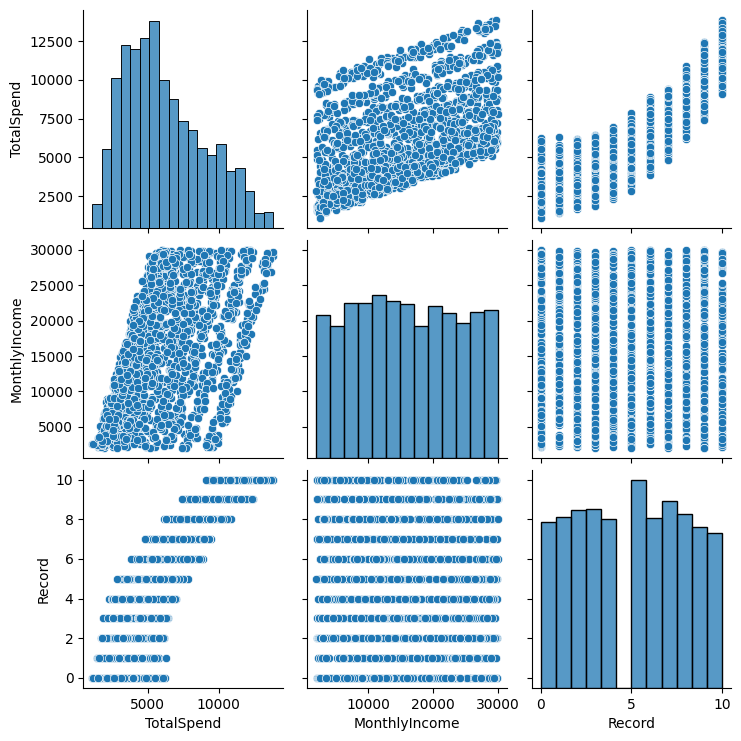

In [ ]:
sns.pairplot(train_data[['TotalSpend', 'MonthlyIncome', 'Record']])
plt.show()
#See all relationships between variables

<h5> We plot all relevant variables together to check for any relationships. We see most relationships are uniform except for 'MonthlyIncome vs TotalSpend', and 'Record vs TotalSpend.' We will see them more in depth to check for the relevant relationships.

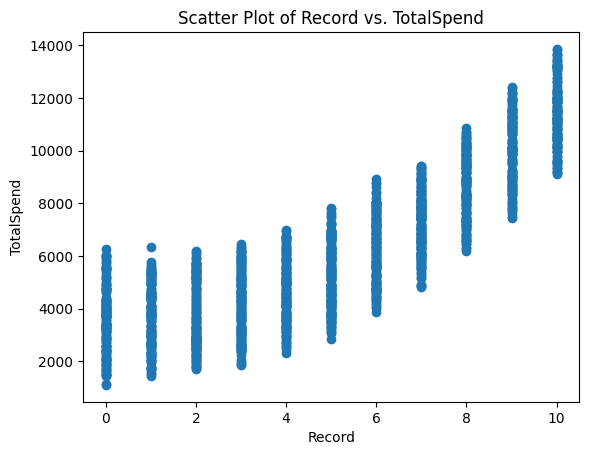

In [ ]:
plt.scatter(train_data['Record'], train_data['TotalSpend'])
plt.xlabel('Record')
plt.ylabel('TotalSpend')
plt.title('Scatter Plot of Record vs. TotalSpend')
plt.show()

In [ ]:
#We fit from 1 to 4 degrees to check the polynomial relationship
# Example for one predictor
X = train_data['Record'].values.reshape(-1, 1)
y = train_data['TotalSpend']

# Fit polynomial models of increasing degree and compare R²
for degree in [1, 2, 3, 4]:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    print(f'Degree {degree}: R² Score = {r2_score(y, y_pred):.4f}')

Degree 1: R² Score = 0.7360
Degree 2: R² Score = 0.8113
Degree 3: R² Score = 0.8114
Degree 4: R² Score = 0.8121


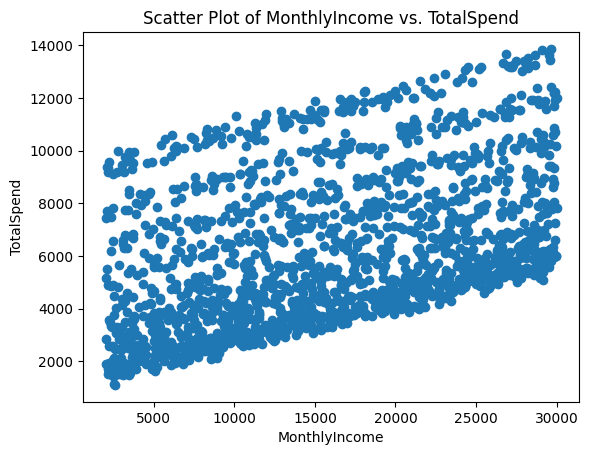

In [ ]:
plt.scatter(train_data['MonthlyIncome'], train_data['TotalSpend'])
plt.xlabel('MonthlyIncome')
plt.ylabel('TotalSpend')
plt.title('Scatter Plot of MonthlyIncome vs. TotalSpend')
plt.show()

In [ ]:
#We fit from 1 to 4 degrees to check the polynomial relationship
# Example for one predictor
X = train_data['MonthlyIncome'].values.reshape(-1, 1)
y = train_data['TotalSpend']

# Fit polynomial models of increasing degree and compare R²
for degree in [1, 2, 3, 4]:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    print(f'Degree {degree}: R² Score = {r2_score(y, y_pred):.4f}')

Degree 1: R² Score = 0.1946
Degree 2: R² Score = 0.1946
Degree 3: R² Score = 0.1946
Degree 4: R² Score = 0.1973


<h5> Using these plots and correlation coefficients, we conclude that there is a 2nd degree relationship with Record, and a linear relationship with monthly income. We will adjust our model for the final conclusion (4 Model Test).

In [32]:
# We proceed to update the model
model_formula = "TotalSpend ~ MonthlyIncome + I(Record**2)"
best_model_train = smf.ols(formula= model_formula, data = train_data).fit()

# 3.7) Residual Analysis

In [37]:
def ols_resid_plots(model):
    import numpy as np
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    from statsmodels.stats.outliers_influence import OLSInfluence
    from statsmodels.nonparametric.smoothers_lowess import lowess

    # Generate the residual values
    residuals = model.resid
    standardized_residuals = OLSInfluence(model).resid_studentized_internal
    fitted_values = model.fittedvalues
    leverage = OLSInfluence(model).hat_matrix_diag
    influence = OLSInfluence(model)
    cooks_d = influence.cooks_distance[0]

    # Number of rows needed for subplots
    nrows = 2
    fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(12, nrows * 6), squeeze=False)


    # Residuals vs Fitted plot
    axs[0, 0].scatter(fitted_values, residuals, alpha=0.5)
    axs[0, 0].axhline(y=0, color='gray', linestyle='--')
    axs[0, 0].set_xlabel('Fitted values')
    axs[0, 0].set_ylabel('Residuals')
    smooth_data = lowess(residuals, fitted_values)
    axs[0, 0].plot(smooth_data[:, 0], smooth_data[:, 1], color='red', alpha=0.5, lw=2)

    # QQ plot for standardized residuals
    sm.graphics.qqplot(standardized_residuals, ax=axs[0, 1], line='45')

    # Scale-Location plot
    axs[1, 0].scatter(fitted_values, np.sqrt(np.abs(standardized_residuals)), alpha=0.5)
    axs[1, 0].set_xlabel('Fitted values')
    axs[1, 0].set_ylabel('sqrt(|Standardized residuals|)')
    smooth_data = lowess(np.sqrt(np.abs(standardized_residuals)), fitted_values)
    axs[1, 0].plot(smooth_data[:, 0], smooth_data[:, 1], color='red', alpha=0.5)

    # Cook's distance plot replacing the previous Leverage vs Standardized Residuals plot
    axs[1, 1].stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
    axs[1, 1].set_xlabel('Observation index')
    axs[1, 1].set_ylabel("Cook's distance")
    cook_threshold = 4 / (len(residuals) - model.df_model)
    axs[1, 1].axhline(y=cook_threshold, linestyle="--", color="red", label=f'Cook\'s Distance Threshold: {cook_threshold:.3f}')
    axs[1, 1].legend()


    plt.show()


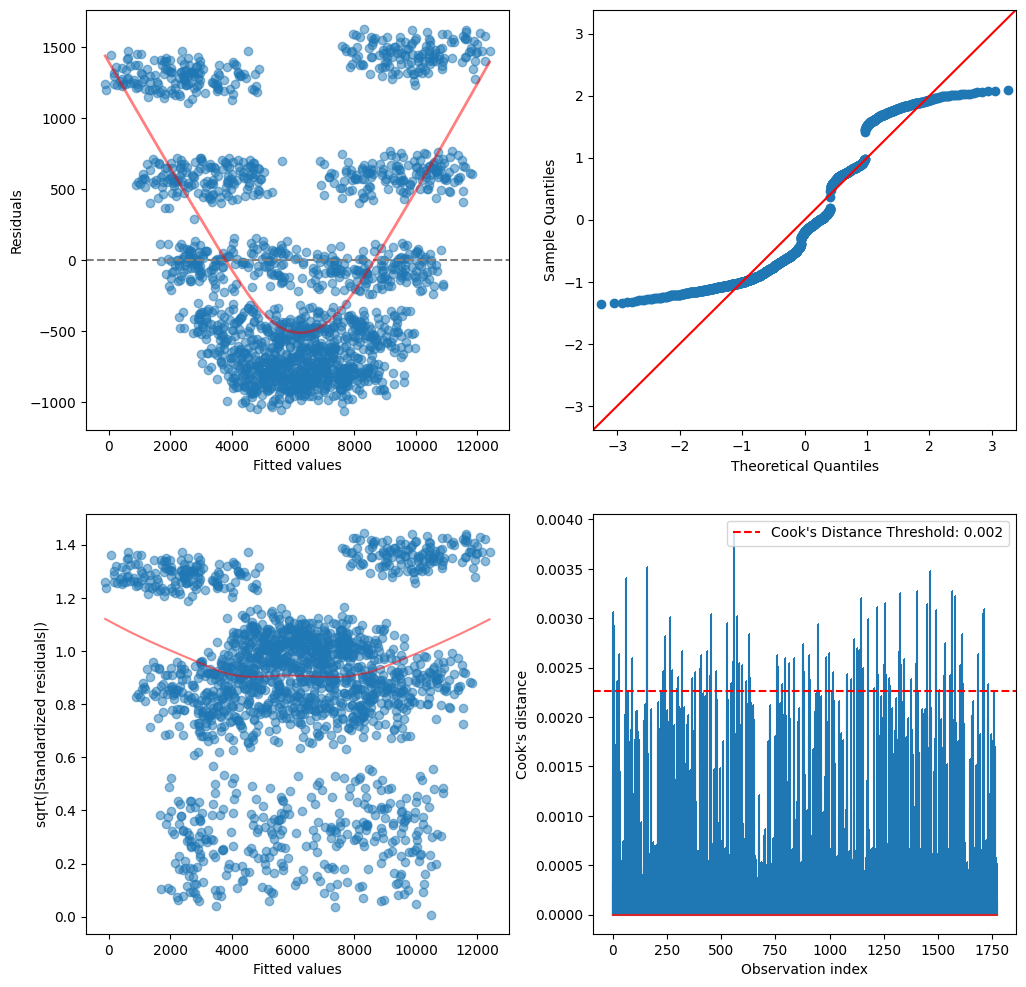

In [46]:
ols_resid_plots(original_model)

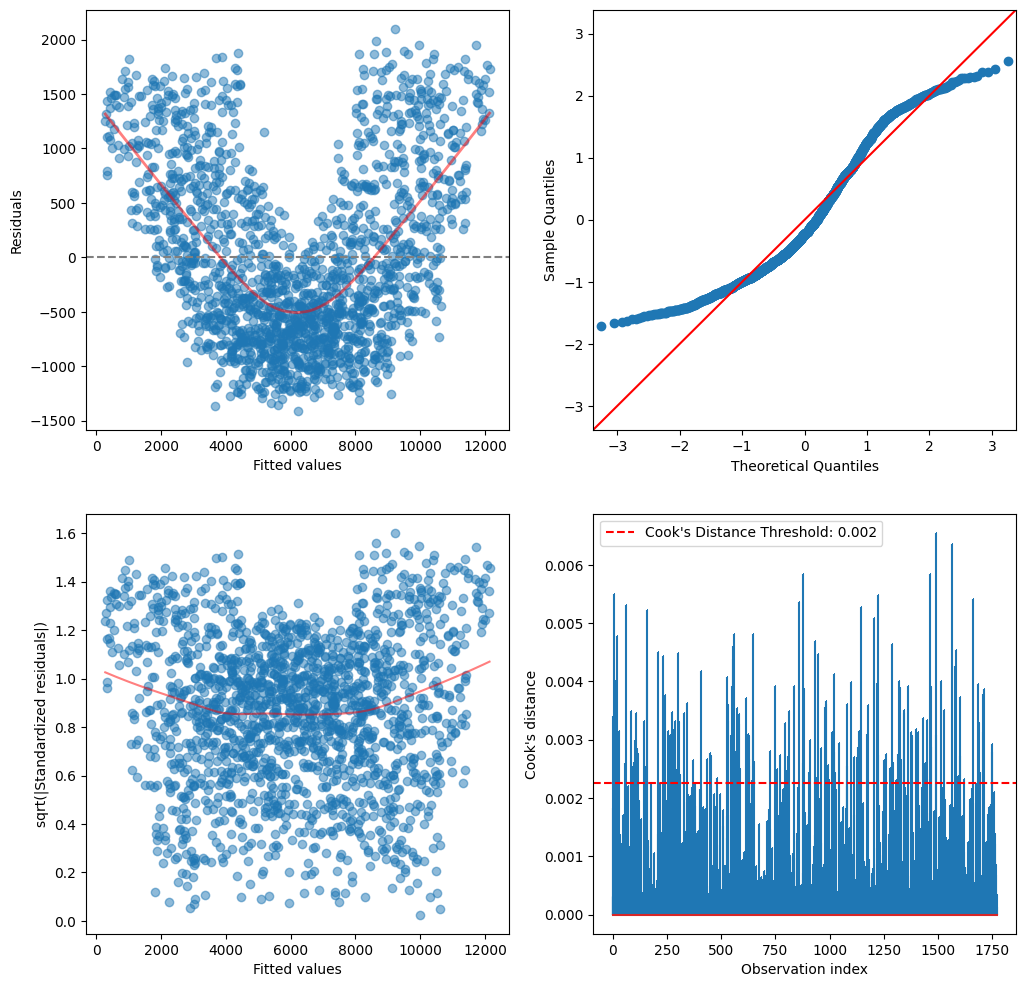

In [38]:
ols_resid_plots(best_model_before_analysis)

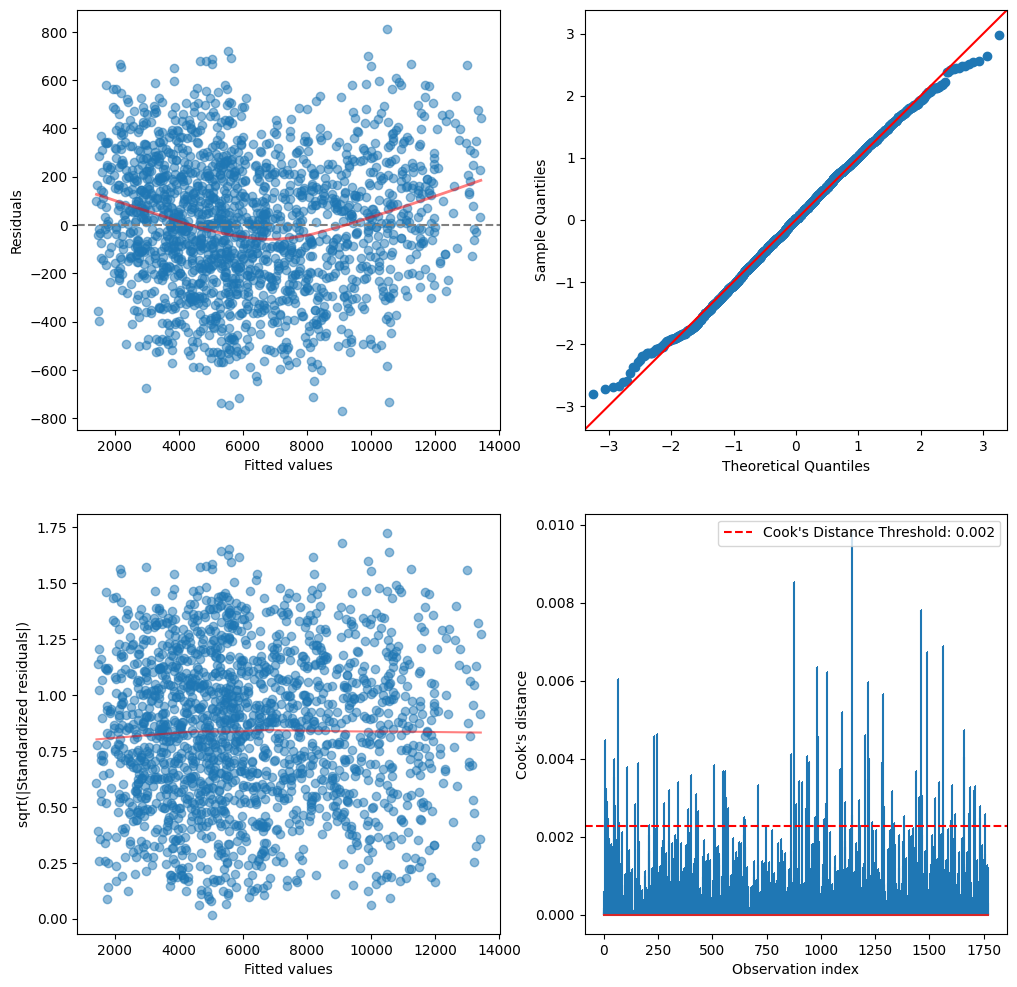

In [47]:
ols_resid_plots(best_model_train)

We have decided to display the residual analysis plot for the three relevant models referenced throughout our code. These are, best_model_train (best definitive model, with polynomial effect), best_model_before_analysis (best model after stepwise and subset regression, does not take into account polynomial/interaction effects), and finally, original_model (model with all variables, first version). The display of all these plots provided a visual representation of the evoluation of each iteartion of the models in our lab, showing evidence of exponential (no pun intended) improvement.

If the bottom left plot, the plot yields informationt on the homogeonity of variance. The large number of observations are not concentrated on a single part of the plot. The liner is virtually constant, signal of non-heterogenous variance. We conclude that residuals are spread equally along the range of predictors.

In the bottom right plot, the ploy yields information on the outliers. We can observe that for the final best model, there are fewer observations over the Cook's Distance Threshold (fewer outliers). As for Cook's distance being a measure of how much a single data point influence the fitted linear regression (the hypothesis) we can determine that are our best model capture more of the underlying relationship, thus we see fewer observations unproportionally absorbing relevance for the OLS when getting to the fitted model.

## 3.7.2) Durbin Watson Test

In [ ]:
from scipy import stats
from statsmodels.stats.stattools import durbin_watson

# Get the Durbin-Watson test statistic
dw = durbin_watson(best_model_train.resid)
print("Durbin-Watson test statistic:", dw)

Durbin-Watson test statistic: 1.9897617247085613


In [35]:
print(best_model_train.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalSpend   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 9.325e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:12:09   Log-Likelihood:                -12449.
No. Observations:                1771   AIC:                         2.490e+04
Df Residuals:                    1768   BIC:                         2.492e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1105.7879     15.953     69.

As expected Durbit Watson statistic is consistent both when computing it with the durbi_watson() function and with the results displayed in the summary(). This value is very close to 2 (1.99), meaning that we fail to reject the null hypothesis that the residuals are independent. This means, there is no expected autocorrelation between them.



<H1> UPDATE THIS- LUIS</H1>

In [ ]:
from scipy import stats
from statsmodels.stats.stattools import durbin_watson

# Get the Durbin-Watson test statistic
dw_train = durbin_watson(best_model_train.resid)
dw_test = durbin_watson(best_model_test.resid)
dw_difference = dw_test - dw_train
dw_percentage_difference = (dw_difference / dw_train) * 100
print("Durbin-Watson test statistic for train data:", dw_train)
print("Durbin-Watson test statistic for test data:", dw_test)
print("Durbin-Watson test statistic difference:", dw_difference)
print("Durbin-Watson test statistic percentage difference:", dw_percentage_difference)


There is a descrepancy of the DW for the train and test data of -0.175, or a percentage difference of -8.82%

## 3.6) Interperting

In [ ]:
basic_error_analysis(best_model_before_analysis)

""" 

Some analysis I did in other exercise (base it on this for RSE): 

We expect 95% of the observed values (total spend) from the hypothesis to lie within 2*RSE, that is (^y - 1564.38, ^y + 1564.38 ) will contain the true value. 

We are misestimating 12.691% of the observations
"""

### 3.6.1) Accuracy 

**Analyze RSE, AIC or BIC**:  


### 3.6.2) Adequacy 

**Analyze f-test, t-tests (the latter, for each beta)**:  

### 3.6.3) Usefulness 

**Analyze adjusted r^2**:  

### 3.6.4) General observations 

**Analyze one Beta value and its significance to the hypothesis**:  

# 4) Testing, best model

## 4.1 Training vs Testing results, best model

In [ ]:
# Let's rememeber first model's results:
print(best_model_train.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalSpend   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 9.325e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:57:11   Log-Likelihood:                -12449.
No. Observations:                1771   AIC:                         2.490e+04
Df Residuals:                    1768   BIC:                         2.492e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1105.7879     15.953     69.

In [ ]:
basic_error_analysis(best_model_train)

SSE: 132291610.313
MSE: 74825.571
RSE: 273.543
Mean Error: 4.438
IC: (^y - 547.09, ^y + 547.09 ) 


<B> NOTES BEFORE TESTING: </b> We would expect R^2 and MSE to be around the same, when we train the model with test data segment. 

Current R^2 is .9921 and MSE is 74825.571

In [ ]:
best_model_test = smf.ols(formula= model_formula, data = test_data).fit()
print(best_model_test.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalSpend   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.981e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:57:11   Log-Likelihood:                -4147.7
No. Observations:                 591   AIC:                             8301.
Df Residuals:                     588   BIC:                             8315.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1133.6962     27.419     41.

In [ ]:
basic_error_analysis(best_model_test)

SSE: 43153472.254
MSE: 73390.259
RSE: 270.906
Mean Error: 4.396
IC: (^y - 541.81, ^y + 541.81 ) 


### 4.2 Conclusions

<B> NOTES: </b> As expected, both R^" and MSE have remain very close to constant. The difference of R^2 is -.001 (-.1%) and MSE is -1435 (-1.91%). Our model (MonthlyIncome, Record^2) has worked succesfully.

TRAIN: 
- R2 = 0.991
- MSE = 74825.571

TEST: 
- R2 = 0.990
- MSE = 73390.259

The result are remarkably consistent between the train and test split.

**FINAL CONCLUSIONS ON LAB:** 